# Introduction

Our goal is to build machine learning models that will predict whether income exceeds $50K/yr based on census data.<br>
The dataset is gathered from [UCI Archive](http://archive.ics.uci.edu/ml/datasets/Adult). The data contains following information
- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc, precision_score, recall_score
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# EDA

In [17]:
df = pd.read_csv('data/adult.data', header = None)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', \
           'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'] 
df.columns = columns
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
#Separate categorical and numberical columns

cat_col = df.dtypes[df.dtypes == 'object'] 
num_col = df.dtypes[df.dtypes != 'object']

**Inspection of Categorical Columns**

In [22]:
# loop through each categorical columns
for col in list(cat_col.index):
    # print column n
    print(col.title())
    # count each unique values of the current column
    total= df[col].value_counts()
    # find percent occurence of each unique value
    percent = df[col].value_counts() / df.shape[0]
    # make a dataframe of based of above 2 lists 
    sub_df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    # print the dataframe
    print(sub_df)
    print('\n')

Workclass
                   total   percent
 Private           22696  0.697030
 Self-emp-not-inc   2541  0.078038
 Local-gov          2093  0.064279
 ?                  1836  0.056386
 State-gov          1298  0.039864
 Self-emp-inc       1116  0.034274
 Federal-gov         960  0.029483
 Without-pay          14  0.000430
 Never-worked          7  0.000215


Education
               total   percent
 HS-grad       10501  0.322502
 Some-college   7291  0.223918
 Bachelors      5355  0.164461
 Masters        1723  0.052916
 Assoc-voc      1382  0.042443
 11th           1175  0.036086
 Assoc-acdm     1067  0.032769
 10th            933  0.028654
 7th-8th         646  0.019840
 Prof-school     576  0.017690
 9th             514  0.015786
 12th            433  0.013298
 Doctorate       413  0.012684
 5th-6th         333  0.010227
 1st-4th         168  0.005160
 Preschool        51  0.001566


Marital.Status
                        total   percent
 Married-civ-spouse     14976  0.459937
 Nev

- **Native.Country, Occupation, Workclass** has unknown values represented by `?`
- 9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
- Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
- Divorced, separated again comes under category separated.
- Self-emp-not-inc, Self-emp-inc comes under category self employed
- Local-gov,State-gov,Federal-gov comes under category goverment emloyees

In [23]:
# Replace ? with Unknown
# columns that contains ?
edit_cols = ['native.country','occupation','workclass']
# loop through each column in the above list
for col in edit_cols:
    # replace ? with Unknown
    df.loc[df[col] == '?', col] = 'unknown'

In [24]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64


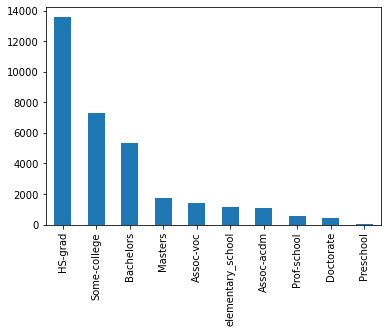

In [25]:
# we will replace 9th, 10th, 11th, 12th with HighSchool
# and 1st-4th,5th-6th,7th-8th with ElementarysSchool
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'] = df['education'].str.strip()
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

print(df['education'].value_counts())
df['education'].value_counts().plot(kind='bar')

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64


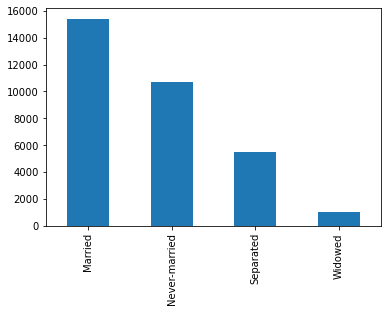

In [26]:
# we will make married status to married, separted, never-married, and widowed

married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital.status'] = df['marital.status'].str.strip()
df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

print(df['marital.status'].value_counts())
df['marital.status'].value_counts().plot(kind='bar')

Private           22696
Govt_employees     4351
Self_employed      3657
?                  1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64


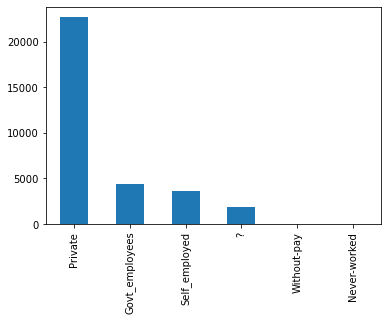

In [27]:
# put self employed, gov employess into one category
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'] = df['workclass'].str.strip()
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

print(df['workclass'].value_counts())
df['workclass'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

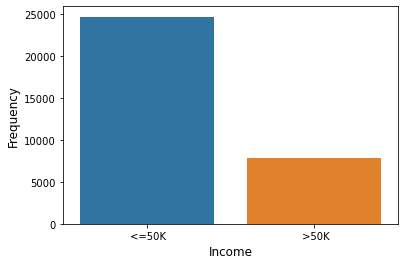

In [28]:
# Income class distribution
sns.countplot(x = 'income', data = df)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

**Inspect Numeric Columns**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD2FC30E20>,
      dtype=object)

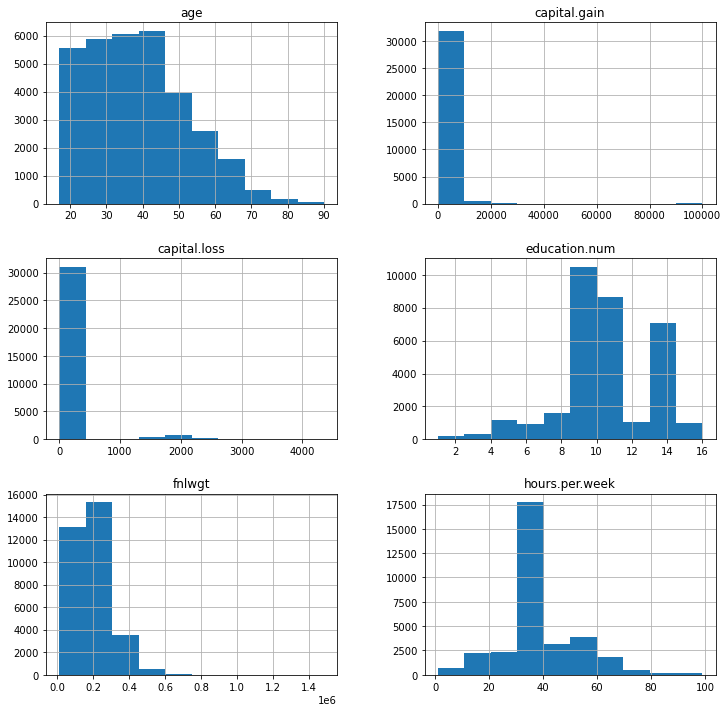

In [29]:
# distribution of numeric data
df[list(num_col.index)].hist(figsize = (12,12))

- **age:** In our dataset People from age group of 18 to 50 can be observed.
- **hours per week:** Generally people can be seen working for 30 hours to 40 hours per week.
- **education:** people above 8th grade are more in our dataset.
- Our dataset is highly skewed and we should consider scaling it for better performance of our models.

Let's explore more for people having capital loss and capital gain greater than zero.

In [30]:
capital_loss_df = df[df['capital.loss']>0]
capital_gain_df = df[df['capital.gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(df.loc[df['capital.gain'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(df.loc[df['capital.loss'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [31]:
capital_gain_0= df[df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = df[df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

       capital.loss  capital.gain
23815          2392             0
26167          1741             0
4018           2392             0
4245           1980             0
25799          1887             0
       capital.loss  capital.gain
5054              0           594
14083             0         14084
32560             0         15024
1433              0           594
27968             0          3137


That means 92% of people are having capital gain equal to zero.<br>

In [32]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {df[(df['capital.loss'] == 0) & (df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(col)
    print(df[(df['capital.loss'] == 0) & (df['capital.gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
workclass
Private           19982
Govt_employees     3714
Self_employed      2960
?                  1655
Without-pay          12
Never-worked          7
Name: workclass, dtype: int64
education
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: education, dtype: int64
marital.status
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: marital.status, dtype: int64
occupation
 Craft-repair         3593
 Adm-clerical         3408
 Prof-specialty       3290
 Exec-managerial      3219
 Sales                3138
 Other-service        3122
 Machine-op-inspct    1806
 ?                    1662
 Transport-moving     1416
 Handlers-cleaners    1274
 Farm

In [33]:
df.loc[df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [34]:
print(f"Number of observations having capital gain of 99999:{df.loc[df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {df.loc[df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts:  >50K    159
Name: income, dtype: int64


In [35]:
print(f"Number of observations having capital loss of 4356:{df.loc[df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{df.loc[df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
 >50K     658
 <=50K    277
Name: income, dtype: int64


**Inspect the columns with respect to income**

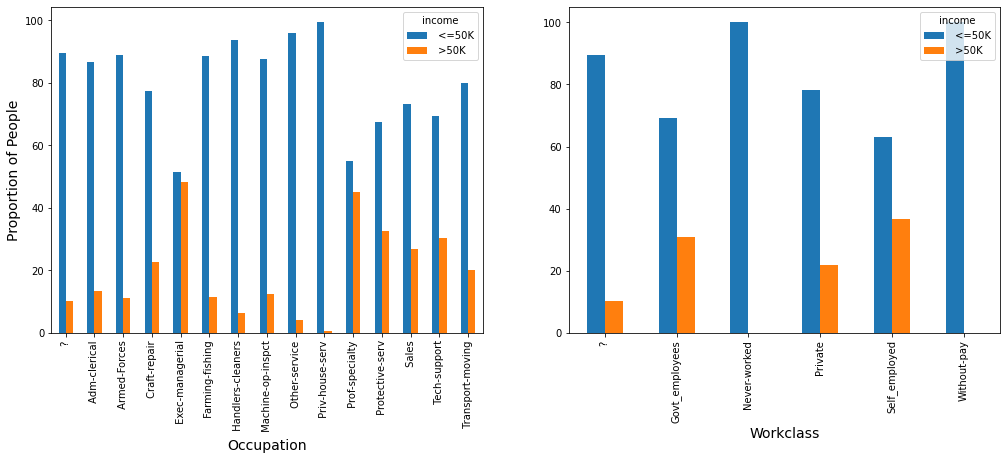

In [36]:
# occupation and income data
table_occu = pd.crosstab(df['occupation'], df['income'])
# workclass and income data
table_workclass = pd.crosstab(df['workclass'], df['income'])
# education and income data
table_edu = pd.crosstab(df['education'], df['income'])
# marital statues and income data
table_marital = pd.crosstab(df['marital.status'], df['income'])
# race and income data
table_race = pd.crosstab(df['race'], df['income'])
# sex and income data
table_sex = pd.crosstab(df['sex'], df['income'])
# country and income data
table_country = pd.crosstab(df['native.country'], df['income'])

fig = plt.figure(figsize = (17,6))

# plot how many percent in each category of occupation has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

# plot how many percent in each category of workclass has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

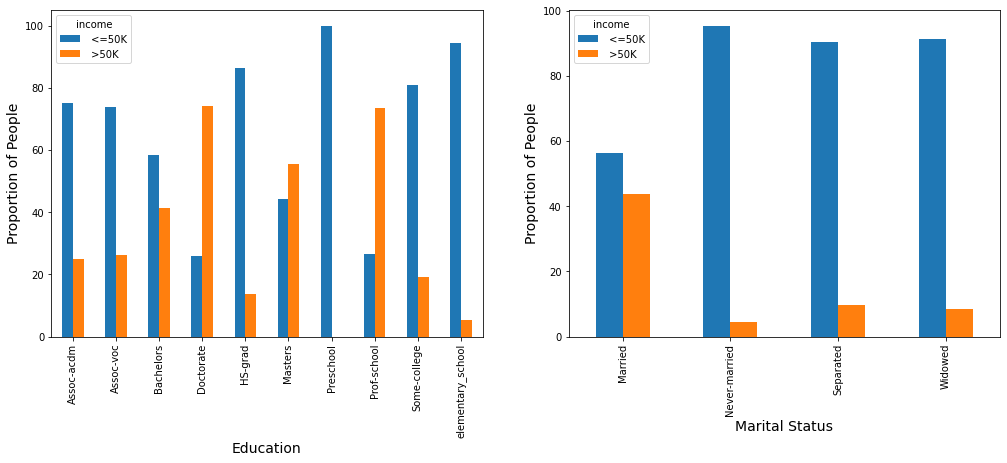

In [37]:
fig = plt.figure(figsize = (17,6))
# plot how many percent in each category of education has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

# plot how many percent in each category of marital status has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

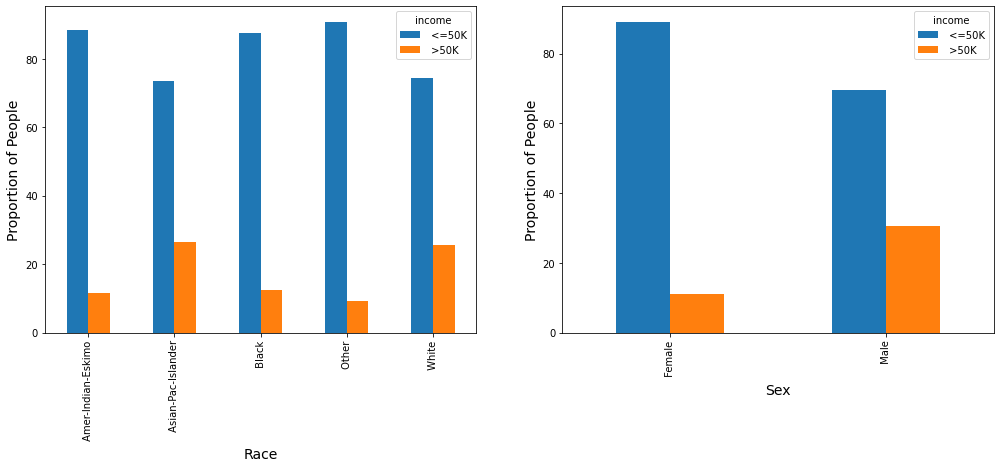

In [38]:
fig = plt.figure(figsize = (17,6))
# plot how many percent in each category of race has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

# plot how many percent in each category of sex has income less than 50k and more than 50k
ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

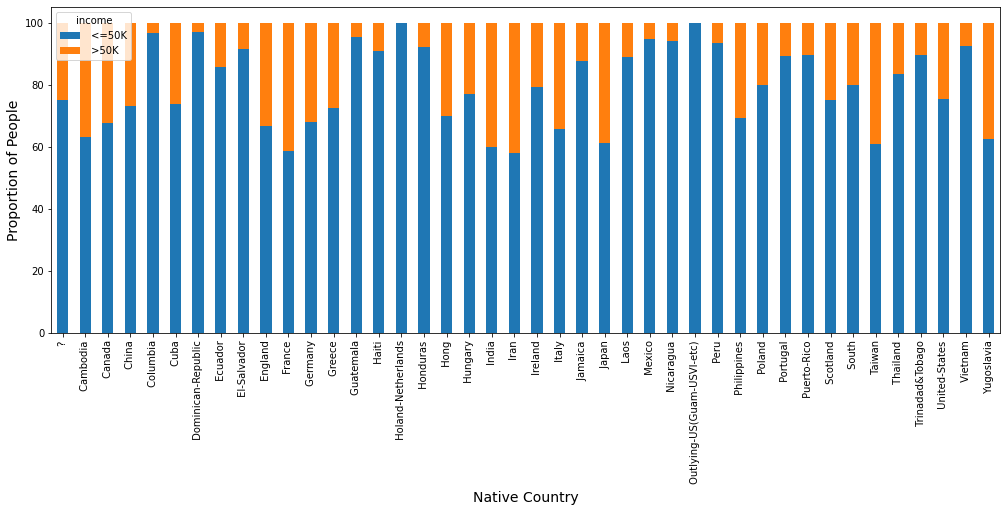

In [39]:
# plot how many percent in each category of native country has income less than 50k and more than 50k
table_country = pd.crosstab(df['native.country'], df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


**Summary**

- Sex: Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K
- Race: White and asain-pac-Islander earn salary more than 50K
- marital_status: 41% of married people seem to earn salary greater than 50K.
- People having degree doctorate,prof-school,masters are making salary more than 50K.
- Out of all the workclass only 59% self employed people are making salary more than 50K.
- If we check by occupation, Proportion of people making salary less than 50K is higher.

**Correlation Map**

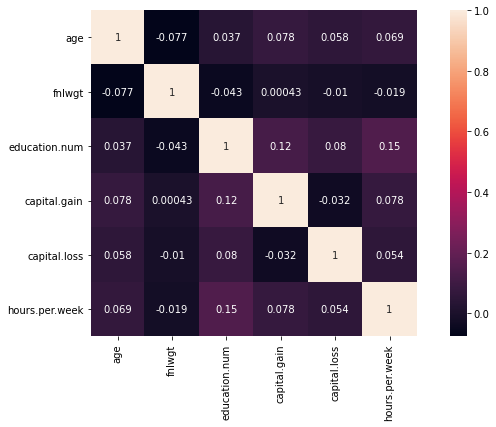

In [40]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(df[list(num_col.index)].corr(),annot = True,square = True);

**strong correlation**
- Age and Hours per week
- capital gain and hours per week

**Moderate Correlation**
- capital loss and age